<a href="https://colab.research.google.com/github/Thasneem-vazim/Lab-programs-sem-2/blob/main/xgb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
file= pd.read_csv('/content/Copy of Survey (Responses) - Form Responses 1 (2).csv')


In [ ]:
x=file[["1) Sadness","2) Discouragement","3) Low self-esteem","4) Inferiority","5) Guilt","6) Indecisiveness","7) Irritability","8) Loss of interest in life","9) Loss of motivation","10) Poor self-image","11) Appetite changes","12) Sleep changes","13) Loss of positivity","14) Hypochondriasis","15) Suicidal impulses"]]

y=file["Class"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2)

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
params = {
 'objective':'binary:logistic',
 'max_depth': 4, 'min_child_weight': 12, 'gamma': 0.3, 'subsample': 0.6,
 'colsample_bytree': 0.6, 'scale_pos_weight': 1,
 'alpha': 0.05,
 'learning_rate': 0.03,
 'n_estimators':1484,'seed': 27
 }
xgb_clf = XGBClassifier(**params)
xgb_clf.fit(x_train,y_train)

XGBClassifier(alpha=0.05, colsample_bytree=0.6, gamma=0.3, learning_rate=0.03,
              max_depth=4, min_child_weight=12, n_estimators=1484,
              objective='multi:softprob', seed=27, subsample=0.6)

In [ ]:
y_pred=xgb_clf.predict(x_test)
print(y_pred)

['Mild depression' 'Moderate depression' 'Borderline depression'
 'Borderline depression' 'Borderline depression' 'Mild depression'
 'Borderline depression' 'Mild depression' 'Borderline depression'
 'Borderline depression' 'Moderate depression' 'Borderline depression'
 'Mild depression' 'Moderate depression' 'Mild depression'
 'Mild depression' 'Moderate depression' 'Mild depression'
 'Moderate depression' 'Mild depression' 'Moderate depression'
 'Mild depression' 'Moderate depression' 'Borderline depression'
 'Moderate depression' 'Mild depression' 'Mild depression'
 'Mild depression' 'Mild depression' 'Borderline depression'
 'Moderate depression' 'Borderline depression' 'Borderline depression'
 'Mild depression' 'Mild depression' 'Mild depression'
 'Moderate depression' 'Moderate depression' 'Moderate depression'
 'Mild depression' 'Borderline depression' 'Moderate depression']


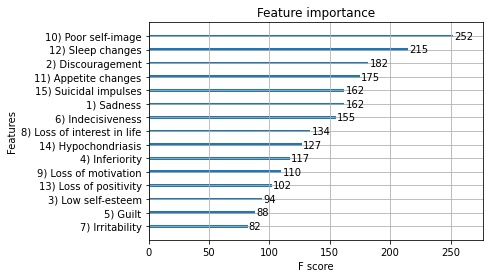

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(xgb_clf)
plt.rcParams['figure.figsize']=[15,15]
plt.show()

In [ ]:
pd.Series(xgb_clf.get_booster().get_fscore()).sort_values(ascending=False)



10) Poor self-image            252
12) Sleep changes              215
2) Discouragement              182
11) Appetite changes           175
1) Sadness                     162
15) Suicidal impulses          162
6) Indecisiveness              155
8) Loss of interest in life    134
14) Hypochondriasis            127
4) Inferiority                 117
9) Loss of motivation          110
13) Loss of positivity         102
3) Low self-esteem              94
5) Guilt                        88
7) Irritability                 82
dtype: int64

from numpy import sort
from sklearn.feature_selection import SelectFromModel
thresholds = sort(xgb_clf.feature_importances_)
print(thresholds)

In [ ]:
from sklearn import metrics
n_min=42
acc_max=0
thresholds=sort(xgb_clf.feature_importances_)
obj_thresh=thresholds[0]
for thresh in thresholds:selection=SelectFromModel(xgb_clf,threshold=thresh,prefit=True)
select_x_train=selection.transform(x_train)
selection_model=XGBClassifier(**params)
selection_model.fit(select_x_train,y_train)
select_x_test=selection.transform(x_test)
predictions=selection_model.predict(select_x_test)
accuracy=metrics.accuracy_score(y_test,predictions)
print("Thresh=%.3f, n=%d, Accuracy: %.2f%%"%(obj_thresh,select_x_train.shape[1],accuracy*100.0))
if(select_x_train.shape[1]<n_min)and(accuracy>acc_max):
  n_min=select_X_train.shape[1]
acc_max=accuracy
obj_thresh=thresh
selection=SelectFromModel(xgb_clf,threshold=obj_thresh,prefit=True)
select_x_train=selection.transform(x_train)
selection_model=XGBClassifier(**params)
selection_model.fit(select_X_train,y_train)
select_x_test=selection.transform(x_test)
predictions=selection_model.predict(select_x_test)
accuracy=metrics.accuracy_score(y_test,predictions)
print("Thresh=%.3f, n=%d, Accuracy: %.2f%%"%(obj_thresh,select_x_train.shape[1],accuracy*100.0))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.038, n=1, Accuracy: 35.71%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.103, n=1, Accuracy: 35.71%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
from sklearn.metrics import f1_score
print("Performance report with XGBoost feature selection and classification is: -")
print('Accuracy = ', metrics.accuracy_score(y_test, predictions)*100)
print("Confusion Matrix =", metrics.confusion_matrix(y_test, predictions, labels=None,
 sample_weight=None))
print("Recall =", metrics.recall_score(y_test, predictions, labels=None,
 pos_label=1, average='weighted',
 sample_weight=None))
print("Precision =", metrics.precision_score(y_test, predictions, labels=None,
 pos_label=1, average='weighted',
 sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_test, y_pred,
 labels=None,
target_names=None,
sample_weight=None,
digits=2,
output_dict=False))
print("F1 Score = ",f1_score(y_test, y_pred, average='macro'))

Performance report with XGBoost feature selection and classification is: -
Accuracy =  35.714285714285715
Confusion Matrix = [[ 0  8  0  0  0]
 [ 0  6 10  0  0]
 [ 0  4  9  0  0]
 [ 0  2  1  0  0]
 [ 0  0  2  0  0]]
Recall = 0.35714285714285715
Precision = 0.24090909090909088
Classification Report =
                        precision    recall  f1-score   support

Borderline depression       0.58      0.88      0.70         8
      Mild depression       0.76      0.81      0.79        16
  Moderate depression       0.77      0.77      0.77        13
        No depression       0.00      0.00      0.00         3
    Severe depression       0.00      0.00      0.00         2

             accuracy                           0.71        42
            macro avg       0.42      0.49      0.45        42
         weighted avg       0.64      0.71      0.67        42

F1 Score =  0.45142191142191146


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: 